In [40]:
import numpy as np
import os

file = 'A020S010R010C001.txt' # txt file with names of skeleton files to be used

joint_dict = {'Nose': 0, 'LEye': 1, 'REye': 2, 'LEar': 3, 'REar': 4, 'LShoulder': 5, 'RShoulder': 6, 'LElbow': 7, 'RElbow': 8, 'LWrist': 9, 'RWrist': 10, 'LHip': 11, 'RHip': 12, 'LKnee': 13, 'RKnee': 14, 'LAnkle': 15, 'RAnkle': 16}

def read_skeleton_file(skeleton_file):
    if not os.path.isfile(skeleton_file):
      print("File does not exist!")
      return None
    with open(skeleton_file, 'r') as f:
        contents = f.readlines()
        f.close()
    frames = int(contents[0])
    next_position = 1
    joints_all_frames = []
    for i in range(frames):
        empty = np.array([0.0, 0.0, 0.0])
        joints = np.full(shape=[17, 3], fill_value=empty)
        joint_nr = int(contents[next_position])
        next_position += 1
        for joint in range(joint_nr):
            v = contents[next_position].split()
            label = v[0]
            xyz = v[1:4]
            uv = v[4:]
            xyz = [float(j) for j in xyz]
            uv = [float(j) for j in uv]
            joints[joint_dict[label]] = xyz
            next_position += 1
            joints_all_frames.append(joints)
    return joints_all_frames

joints= read_skeleton_file(file)
if joints:
  print(len(joints)/17)


83.0


Nose - X: 0.5439 - Y: -0.3656 - Z: 3.754
LEye - X: 0.5763 - Y: -0.4095 - Z: 3.75
REye - X: 0.5141 - Y: -0.4065 - Z: 3.815
LEar - X: 0.6579 - Y: -0.4287 - Z: 3.819
REar - X: 0.5154 - Y: -0.4161 - Z: 4.047
LShoulder - X: 0.7833 - Y: -0.2239 - Z: 3.836
RShoulder - X: 0.4618 - Y: -0.1686 - Z: 3.952
LElbow - X: 0.8638 - Y: 0.0461 - Z: 3.815
RElbow - X: 0.4034 - Y: 0.1468 - Z: 3.747
LWrist - X: 0.9033 - Y: 0.2886 - Z: 3.734
RWrist - X: 0.4502 - Y: 0.1055 - Z: 3.686
LHip - X: 0.722 - Y: 0.3092 - Z: 3.732
RHip - X: 0.5206 - Y: 0.3501 - Z: 3.744
LKnee - X: 0.7184 - Y: 0.7484 - Z: 3.424
RKnee - X: 0.5373 - Y: 0.8116 - Z: 3.704
LAnkle - X: 0.7632 - Y: 1.1522 - Z: 3.298
RAnkle - X: 0.5423 - Y: 1.2198 - Z: 3.494


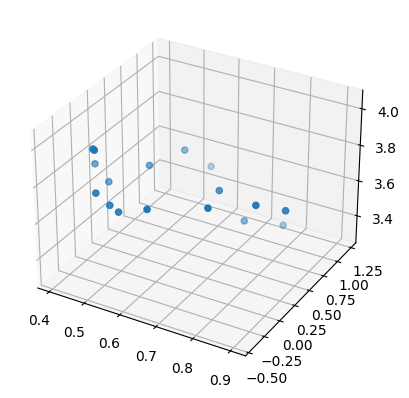

In [48]:
import matplotlib.pyplot as plt

X = []
Y = []
Z = []
for joint_name in joint_dict:
  frame_number = 60
  selected_joint = joint_dict[joint_name]
  first_frame_points = joints[frame_number][selected_joint]
  X.append(first_frame_points[0])
  Y.append(first_frame_points[1])
  Z.append(first_frame_points[2])
  print(joint_name, "- X:", first_frame_points[0], "- Y:", first_frame_points[1], "- Z:", first_frame_points[2])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, marker="o")
fig.show()